In [168]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

In [2]:
data_file_path = os.path.join("Resources", "GDPpc.csv")

In [3]:
data_file_df = pd.read_csv(data_file_path)
data_file_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDP,TOT,USD_CAP,A,2016,50237.794429,NaN
1,AUS,GDP,TOT,USD_CAP,A,2017,51011.462916,NaN
2,AUS,GDP,TOT,USD_CAP,A,2018,54262.882851,NaN
3,AUS,GDP,TOT,USD_CAP,A,2019,54262.617559,E
4,AUT,GDP,TOT,USD_CAP,A,2016,52665.087457,NaN


In [7]:
GDP_dfv2=data_file_df.replace({'LOCATION': {'AUS':'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 
                             'CAN': 'Canada', 'CZE': 'Czech Republic', 'DNK': 'Denmark',
                             'FIN': 'Finland', 'FRA': 'France',  'DEU': 'Germany',                           
                             'GRC': 'Greece', 'HUN': 'Hungary',  'ISL': 'Iceland',
                             'IRL': 'Ireland', 'ITA': 'Italy', 'JPN': 'Japan',
                             'KOR': 'Korea','LUX': 'Luxembourg', 'MEX': 'Mexico', 
                             'NLD': 'Netherlands',  'NZL': 'New Zealand', 'NOR': 'Norway',
                             'POL': 'Poland','PRT': 'Portugal','SVK': 'Slovak Republic',
                             'SVN': 'Slovenia','ESP': 'Spain','SWE': 'Sweden', 'GBR': 'United Kingdom',
                             'TUR': 'Turkey',  'USA': 'United States','CHE': 'Sitzerland',
                             'CHL': 'Chile', 'EST': 'Estonia','ISR': 'Israel',
                             'LVA': 'Latvia', 'LTU': 'Lithuania'}
                            })

In [13]:
GDP_dfv3=GDP_dfv2.drop(columns=["INDICATOR","SUBJECT","MEASURE","FREQUENCY","Flag Codes"])

In [14]:
GDP_dfv3["TIME"].max()

2019

In [16]:
filter_DF=GDP_dfv3["TIME"]==2019

In [17]:
GDP_dfv4=GDP_dfv3[filter_DF]

In [36]:
GDP_dfv5=GDP_dfv4.rename(columns={"LOCATION":"Country"})
GDP_dfv5

,Country,TIME,Value
3,Australia,2019,54262.617559
7,Austria,2019,60414.134820
11,Belgium,2019,56324.225263
15,Canada,2019,51822.194963
19,Czech Republic,2019,44298.571352
23,Denmark,2019,62106.494063
27,Finland,2019,53160.333274
31,France,2019,50693.499396
35,Germany,2019,57557.866746
39,Greece,2019,31789.788858


In [31]:
data_file_pathv2 = os.path.join("Resources", "ITUC.csv")
ITUC_df = pd.read_csv(data_file_pathv2)
ITUC_dfv2=ITUC_df.drop(columns=["Unnamed: 0"])
ITUC_dfv2

,Country,Year,Union %,Gini,CPI,Score
0,Hungary,2009,11.9,0.245,95.369304,3.0
1,Hungary,2015,9.0,0.291,111.384411,3.0
2,Poland,2009,16.3,0.305,97.484226,3.0
3,Poland,2010,18.3,0.307,100.000000,3.0
4,Poland,2011,17.0,0.304,104.239401,3.0
...,...,...,...,...,...,...
269,United States,2013,10.8,0.392,106.833852,4.0
270,United States,2014,10.7,0.389,108.566940,4.0
271,United States,2015,10.6,0.384,108.695723,4.0
272,United States,2016,10.3,0.385,110.067028,4.0


In [50]:
result_df=ITUC_dfv2.merge(GDP_dfv5,how="left",on="Country")
result1=result_df.rename(columns={"Value":"GDP Per Capita (2020)","Score":"ITUC Rating (2020)"})
working_df=result1.drop(columns=["TIME","CPI"])
working_df

,Country,Year,Union %,Gini,ITUC Rating (2020),GDP Per Capita (2020)
0,Hungary,2009,11.9,0.245,3.0,34962.136129
1,Hungary,2015,9.0,0.291,3.0,34962.136129
2,Poland,2009,16.3,0.305,3.0,34781.291291
3,Poland,2010,18.3,0.307,3.0,34781.291291
4,Poland,2011,17.0,0.304,3.0,34781.291291
...,...,...,...,...,...,...
269,United States,2013,10.8,0.392,4.0,65240.379025
270,United States,2014,10.7,0.389,4.0,65240.379025
271,United States,2015,10.6,0.384,4.0,65240.379025
272,United States,2016,10.3,0.385,4.0,65240.379025


In [104]:
rating_gdp_df=working_df[["Country","ITUC Rating (2020)","GDP Per Capita (2020)"]]

In [113]:
rating_gdp_dfv2=rating_gdp_df.drop_duplicates()

In [121]:
plot_df=rating_gdp_dfv2.groupby("ITUC Rating (2020)").mean()

In [122]:
plot_df2=plot_df.reset_index()
plot_df2

,ITUC Rating (2020),GDP Per Capita (2020)
0,1.0,59486.509778
1,2.0,44095.783210
2,3.0,43479.622633
3,4.0,37788.199942
4,5.0,34741.325410


<AxesSubplot:xlabel='ITUC Rating (2020)'>

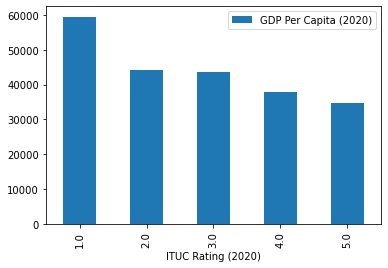

In [123]:
plot_df2.plot.bar("ITUC Rating (2020)","GDP Per Capita (2020)")

In [132]:
max_timepoint=working_df.groupby("Country")["Year"].max()

In [196]:
max_timepoint_df=pd.merge(max_timepoint,working_df,on=["Country","Year"]).drop([21,29,32])
max_timepoint_df

,Country,Year,Union %,Gini,ITUC Rating (2020),GDP Per Capita (2020)
0,Australia,2018,13.7,0.313,3.0,54262.617559
1,Austria,2018,26.3,0.284,1.0,60414.134820
2,Belgium,2018,50.3,0.257,2.0,56324.225263
3,Canada,2018,25.9,0.309,2.0,51822.194963
4,Chile,2015,16.1,0.453,4.0,26879.861939
5,Czech Republic,2018,11.5,0.241,2.0,44298.571352
6,Denmark,2017,66.1,0.265,1.0,62106.494063
7,Estonia,2018,4.3,0.287,2.0,40040.294485
8,Finland,2018,60.3,0.275,1.0,53160.333274
9,France,2018,8.8,0.307,2.0,50693.499396


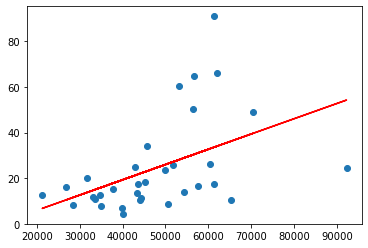

Coefficient of Determination: 0.4679402762566376


In [197]:
x=max_timepoint_df["GDP Per Capita (2020)"].values.reshape(-1,1)
y=max_timepoint_df["Union %"].values.reshape(-1,1)
slope, intercept, r_value, p_value, std_err = stats.linregress(x[:,0], y[:,0])
plt.plot(x,y,"o")
plt.plot(x,intercept+slope*x,"r")
plt.show()
print(f'Coefficient of Determination: {r_value}')

In [198]:
gdp=max_timepoint_df["GDP Per Capita (2020)"]
quartiles=gdp.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[.75]
iqr=upperq - lowerq
lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)
print(f"The IQR is: {iqr}")
outliers=max_timepoint_df.loc[(max_timepoint_df['GDP Per Capita (2020)'] < lower_bound) | (max_timepoint_df['GDP Per Capita (2020)'] > upper_bound)]
outliers

The IQR is: 18844.881963


,Country,Year,Union %,Gini,ITUC Rating (2020),GDP Per Capita (2020)
14,Ireland,2017,24.5,0.293,1.0,92232.233525


In [199]:
ud=max_timepoint_df["Union %"]
quartiles=ud.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[.75]
iqr=upperq - lowerq
lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)
print(f"The IQR is: {iqr}")
outliers=max_timepoint_df.loc[(max_timepoint_df['Union %'] < lower_bound) | (max_timepoint_df['Union %'] > upper_bound)]
outliers

The IQR is: 14.399999999999999


,Country,Year,Union %,Gini,ITUC Rating (2020),GDP Per Capita (2020)
2,Belgium,2018,50.3,0.257,2.0,56324.225263
6,Denmark,2017,66.1,0.265,1.0,62106.494063
8,Finland,2018,60.3,0.275,1.0,53160.333274
13,Iceland,2017,91.0,0.249,1.0,61343.567930
25,Norway,2018,49.2,0.273,1.0,70381.790905
31,Sweden,2018,64.9,0.266,1.0,56701.109030


In [201]:
drop_outliers_df=max_timepoint_df.drop([14,2,6,8,13,25,31])

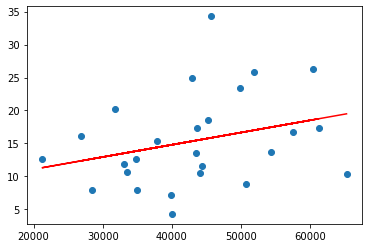

Coefficient of Determination: 0.29293835273030655


In [203]:
x=drop_outliers_df["GDP Per Capita (2020)"].values.reshape(-1,1)
y=drop_outliers_df["Union %"].values.reshape(-1,1)
slope, intercept, r_value, p_value, std_err = stats.linregress(x[:,0], y[:,0])
plt.plot(x,y,"o")
plt.plot(x,intercept+slope*x,"r")
plt.show()
print(f'Coefficient of Determination: {r_value}')